Steps:
1. Importing the libraries and data
2. Cleaning (Dealing with missing values)
3. Importance of variables affecting the model
4. Train test split
5. Running the model on train and checking accuracy on test
6. Saving the model and using it for future predictions

### Importing libraries

In [1]:
import os
os.chdir("D:/credit scoring")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel("cs-training - Copy.xlsx")
df= data.copy()
df.head()

,Sr.no,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.info()   #Total 1.5 Lacks observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr.no                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
#Finding out the missing values in the data

df.isnull().sum()         

Sr.no                                       0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


#Monthly income and number of dependents values are missing. Imputing them with mean and median

In [5]:
m1 = df.MonthlyIncome.mean()
m2= df.NumberOfDependents.median()

df.loc[df.MonthlyIncome.isnull(),'MonthlyIncome'] = m1
df.loc[df.NumberOfDependents.isnull(),'NumberOfDependents'] = m2

In [6]:
#df.NumberOfDependents.value_counts()

### Let's find out the balance in our dependent variable.
### We get to know that out of 1.5 lac observation we have default cases of 6.67%  (10026 observations of NPA)

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


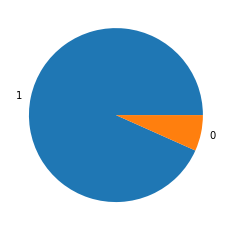

In [7]:
pie = df.SeriousDlqin2yrs.value_counts()
print(pie)
lab= '1','0'
plt.pie(pie, labels = lab)
plt.show()

#We have imbalanced data which is fine as number of defaults will always be very low compared to normal accounts

### Data Preprocessing

#### Finding out which columns are not needed

In [8]:
df.columns

Index(['Sr.no', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [9]:
#Removing Serial Numbers

df= df.drop(['Sr.no'], axis=1)
print(df.columns)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


Renaming variables

In [10]:
df= df.rename(columns={'age':'Age'})
df= df.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'Times_30-59_DPD'})
df= df.rename(columns={'NumberOfTimes90DaysLate':'Times_90_DPD'})
df= df.rename(columns={'NumberOfTime60-89DaysPastDueNotWorse':'Times_60-89_DPD'})
df= df.rename(columns={'RevolvingUtilizationOfUnsecuredLines':'Utilazn_unsecure_lines'})
df= df.rename(columns={'NumberOfOpenCreditLinesAndLoans':'No_ofOpenCreditLinesAndLoans'})
df= df.rename(columns={'NumberRealEstateLoansOrLines':'No_ofRealEstateLoansOrLines'})
print(df.columns)

Index(['SeriousDlqin2yrs', 'Utilazn_unsecure_lines', 'Age', 'Times_30-59_DPD',
       'DebtRatio', 'MonthlyIncome', 'No_ofOpenCreditLinesAndLoans',
       'Times_90_DPD', 'No_ofRealEstateLoansOrLines', 'Times_60-89_DPD',
       'NumberOfDependents'],
      dtype='object')


# Correlation

In [11]:
df.corr()

,SeriousDlqin2yrs,Utilazn_unsecure_lines,Age,Times_30-59_DPD,DebtRatio,MonthlyIncome,No_ofOpenCreditLinesAndLoans,Times_90_DPD,No_ofRealEstateLoansOrLines,Times_60-89_DPD,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.018002,-0.029669,0.117175,-0.007038,0.102261,0.046869
Utilazn_unsecure_lines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.006565,-0.011281,-0.001061,0.006235,-0.001048,0.001193
Age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.032984,0.147705,-0.061005,0.033150,-0.057159,-0.215693
Times_30-59_DPD,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.007636,-0.055312,0.983603,-0.030565,0.987005,-0.004590
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.005355,0.049565,-0.008320,0.120046,-0.007533,-0.044476
MonthlyIncome,-0.018002,0.006565,0.032984,-0.007636,-0.005355,1.000000,0.082319,-0.009484,0.113823,-0.008259,0.058192
No_ofOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.082319,1.000000,-0.079984,0.433959,-0.071077,0.074026
Times_90_DPD,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.009484,-0.079984,1.000000,-0.045205,0.992796,-0.011962
No_ofRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.113823,0.433959,-0.045205,1.000000,-0.039722,0.129399
Times_60-89_DPD,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.008259,-0.071077,0.992796,-0.039722,1.000000,-0.012678


<AxesSubplot:>

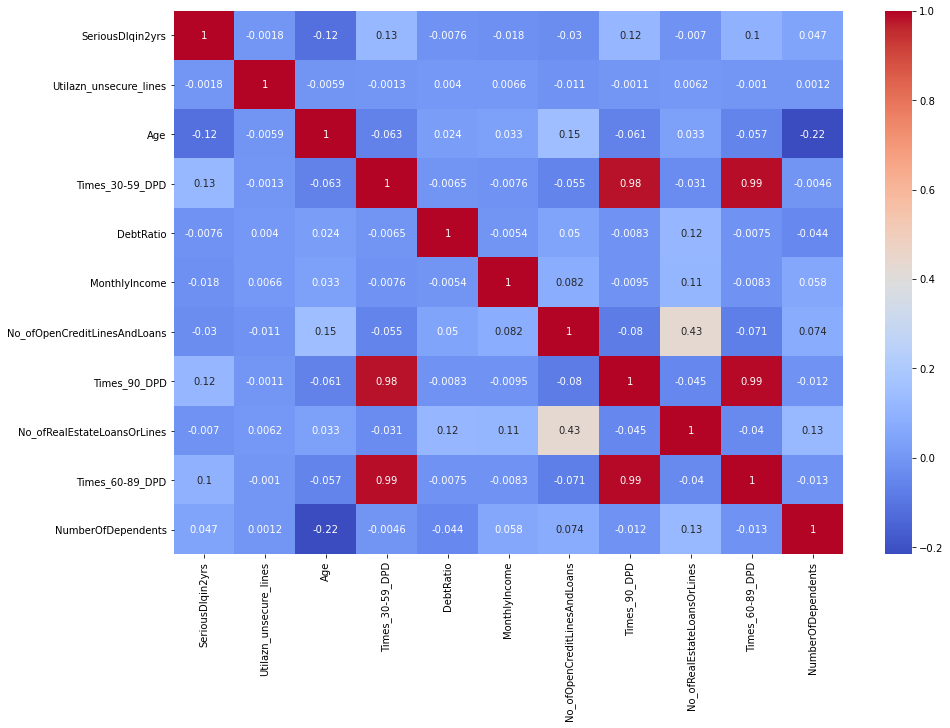

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# High correlation filter

In [13]:
#High correlation filter
#Deleted the highly correlated variables and performed the whole analysis with logistic reg
'''
df1= df.copy()
df1= df1.drop(['Times_90_DPD','Times_60-89_DPD'], axis=1)
df1.columns

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)
'''

#ROC score= 0.71, Gini = 0.43  #not acceptable

"\ndf1= df.copy()\ndf1= df1.drop(['Times_90_DPD','Times_60-89_DPD'], axis=1)\ndf1.columns\n\nplt.figure(figsize=(15,10))\nsns.heatmap(df1.corr(),cmap='coolwarm',annot=True)\n"

# Multicollinearity

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(df.columns[1:])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,91.181454,Times_60-89_DPD
6,73.196302,Times_90_DPD
2,41.173336,Times_30-59_DPD
5,4.569067,No_ofOpenCreditLinesAndLoans
1,3.655581,Age
7,2.304289,No_ofRealEstateLoansOrLines
9,1.402417,NumberOfDependents
4,1.287284,MonthlyIncome
3,1.048958,DebtRatio
0,1.000778,Utilazn_unsecure_lines


In [15]:
#To remove multicollinearities, we can do two things. We can create new features or remove them from our data.

#Removing features is not recommended at first. The reason is that there’s a possibility of information loss because we remove that feature.
#The result will be same as above. Hence not deleting the variables and proceeding with a diff method


# Weight of Evidence and Information Value

In [16]:
features = df[df.columns.difference(['SeriousDlqin2yrs'])]
labels = df['SeriousDlqin2yrs']

In [17]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [18]:
final_iv, IV = data_vars(df,df.SeriousDlqin2yrs)
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
9,Utilazn_unsecure_lines,1.016361
8,Times_90_DPD,0.484202
6,Times_30-59_DPD,0.471831
7,Times_60-89_DPD,0.264824
0,Age,0.261261
2,MonthlyIncome,0.072611
5,NumberOfDependents,0.023730
1,DebtRatio,0.012360
3,No_ofOpenCreditLinesAndLoans,0.003695
4,No_ofRealEstateLoansOrLines,0.001605


#Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. In other words, it's designed mainly for binary logistic regression model. Also think this way - Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.

df1= df.copy()
df1= df1.drop(['Utilazn_unsecure_lines','NumberOfDependents', 'No_ofOpenCreditLinesAndLoans', 'No_ofRealEstateLoansOrLines'], axis=1)
df1.columns

In [44]:
# splitting the dataset into x(independent variables) and y(dependent variables)

X = df.iloc[:,1:10]
y = df.iloc[:,0]

print(X.shape)
print(y.shape)

print(X.columns)
print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

(150000, 9)
(150000,)
Index(['Utilazn_unsecure_lines', 'Age', 'Times_30-59_DPD', 'DebtRatio',
       'MonthlyIncome', 'No_ofOpenCreditLinesAndLoans', 'Times_90_DPD',
       'No_ofRealEstateLoansOrLines', 'Times_60-89_DPD'],
      dtype='object')
0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64


In [33]:
#Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))
a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

print(classification_report(y_pred, y_test))

C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9332190476190476
Testing Accuracy : 0.9334888888888889
[[41922    61]
 [ 2932    85]]
0.7584120717994638
Gini score is:  0.5168241435989276
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     44854
           1       0.03      0.58      0.05       146

    accuracy                           0.93     45000
   macro avg       0.51      0.76      0.51     45000
weighted avg       1.00      0.93      0.96     45000



In [36]:
import pickle

pickle.dump(model,open("D:/credit scoring/savedmodel.pkl", "wb"))

In [38]:
savedmodel=pickle.load(open("D:/credit scoring/savedmodel.pkl", "rb"))

In [39]:
ypredict= savedmodel.predict(X_test)

In [41]:
X_test["Predictions"]=ypredict

<ipython-input-41-59eae9dc0685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Predictions"]=ypredict


In [42]:
X_test

,Utilazn_unsecure_lines,Age,Times_30-59_DPD,DebtRatio,MonthlyIncome,No_ofOpenCreditLinesAndLoans,Times_90_DPD,No_ofRealEstateLoansOrLines,Times_60-89_DPD,Predictions
145857,0.032827,80,0,0.383087,3925.000000,7,0,1,0,0
144226,0.016114,55,0,2666.000000,6670.221237,8,0,2,0,0
48475,0.000000,43,0,0.272497,7500.000000,6,0,2,0,0
116712,0.150282,32,0,0.362440,6000.000000,10,0,2,0,0
31364,0.513385,46,0,0.180825,8416.000000,7,0,0,0,0


In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))

a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

Training Accuracy : 0.9995333333333334
Testing Accuracy : 0.9337666666666666
[[27602   358]
 [ 1629   411]]
0.739365915347455
Gini score is:  0.47873183069491


In [47]:
a=model.feature_importances_

In [48]:
a

array([0.20102791, 0.13176745, 0.04816102, 0.19163706, 0.15544037,
       0.09137905, 0.09640949, 0.03520953, 0.04896812])

In [49]:
abc= pd.DataFrame()
abc["Feature Name"] = X_test.columns
abc["Importance"] = a

In [50]:
abc

,Feature Name,Importance
0,Utilazn_unsecure_lines,0.201028
1,Age,0.131767
2,Times_30-59_DPD,0.048161
3,DebtRatio,0.191637
4,MonthlyIncome,0.155440
5,No_ofOpenCreditLinesAndLoans,0.091379
6,Times_90_DPD,0.096409
7,No_ofRealEstateLoansOrLines,0.035210
8,Times_60-89_DPD,0.048968


# PCA + Logistic


In [22]:
#PCA
#always do standard scaling before doing pca

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(df)

StandardScaler()

In [23]:
scaled_data = scaler.transform(df)

In [24]:
scaled_data

array([[ 3.73645569, -0.02115001, -0.49385982, ...,  4.40954554,
        -0.05785249,  1.14052977],
       [-0.26763331, -0.02038516, -0.83234222, ..., -0.90128301,
        -0.05785249,  0.23720186],
       [-0.26763331, -0.02158222, -0.96773518, ..., -0.90128301,
        -0.05785249, -0.66612604],
       ...,
       [-0.26763331, -0.02323239,  0.38619443, ..., -0.01614492,
        -0.05785249, -0.66612604],
       [-0.26763331, -0.02421753, -1.50930703, ..., -0.90128301,
        -0.05785249, -0.66612604],
       [-0.26763331, -0.02081306,  0.79237332, ...,  0.86899317,
        -0.05785249, -0.66612604]])

In [25]:
df.shape

(150000, 11)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca= PCA(0.9999)  #It means retain 99.99% of the useful features

df_pca = pca.fit_transform(df)
df_pca.shape


###If we choose to retain and caluculate 9 dimensions
#pca= PCA(n_components = 9)
#df_pca = pca.fit_transform(df)

pca.explained_variance_ratio_

array([9.75222049e-01, 2.44095495e-02, 3.66644680e-04])

In [28]:
#it means the newly formed 1st column is explaining 89.5% of variation, 2nd is explaining 10% while 3rd 0.07%

#NOte: we cannot know what are those columns

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
#LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))
a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

Training Accuracy : 0.9332190476190476
Testing Accuracy : 0.9334888888888889
[[41922    61]
 [ 2932    85]]
0.7584120717994638
Gini score is:  0.5168241435989276


C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#Ref: https://github.com/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb
#https://sundarstyles89.medium.com/variable-selection-using-python-vote-based-approach-faa42da960f0

#very useful in finding our variable importance 
#https://github.com/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb